In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import missingno as msno

%matplotlib inline

In [2]:
df = pd.read_csv('/content/bmw.csv')
df['model'] = df['model'].str.strip() # 'model' values had a leading space

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [5]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


categorical values

In [6]:
cat_col = ['model', 'year', 'transmission', 'fuelType']
sns.set_style('whitegrid')
for col in cat_col:
    unique = df[col].nunique()
    print('There are {} unique values in "{}" column'.format(unique, col))

There are 24 unique values in "model" column
There are 25 unique values in "year" column
There are 3 unique values in "transmission" column
There are 5 unique values in "fuelType" column


Countplot functtion

In [9]:
def col_count(col):
    plt.figure(figsize=(14,6))
    num_unique_values = df[col].nunique() #get the number of unique values in the column

    palette = sns.color_palette("hls", num_unique_values)
    sns.countplot(y=col, data=df.sort_values(col), palette=palette).set_title('Count of {}'.format(col))

<ipython-input-9-f4ebae038f96>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df.sort_values(col), palette=palette).set_title('Count of {}'.format(col))


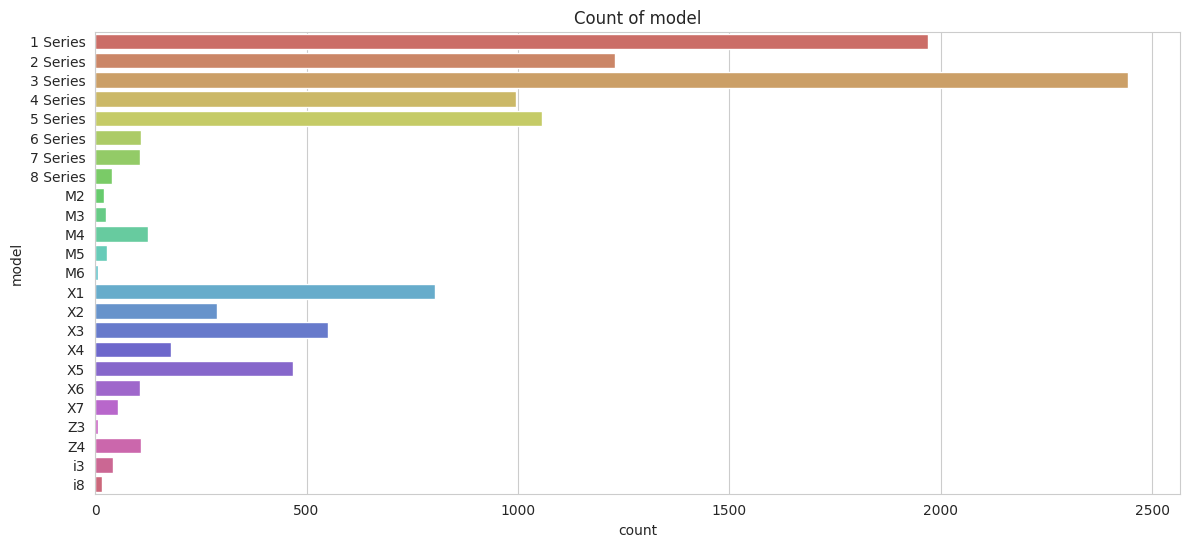

In [10]:
col_count('model')

here exists a system of sub-models for BMW's used cars as they share a same pre/suffix.

"Series", "M", "X", "Z", "i"

<ipython-input-9-f4ebae038f96>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df.sort_values(col), palette=palette).set_title('Count of {}'.format(col))


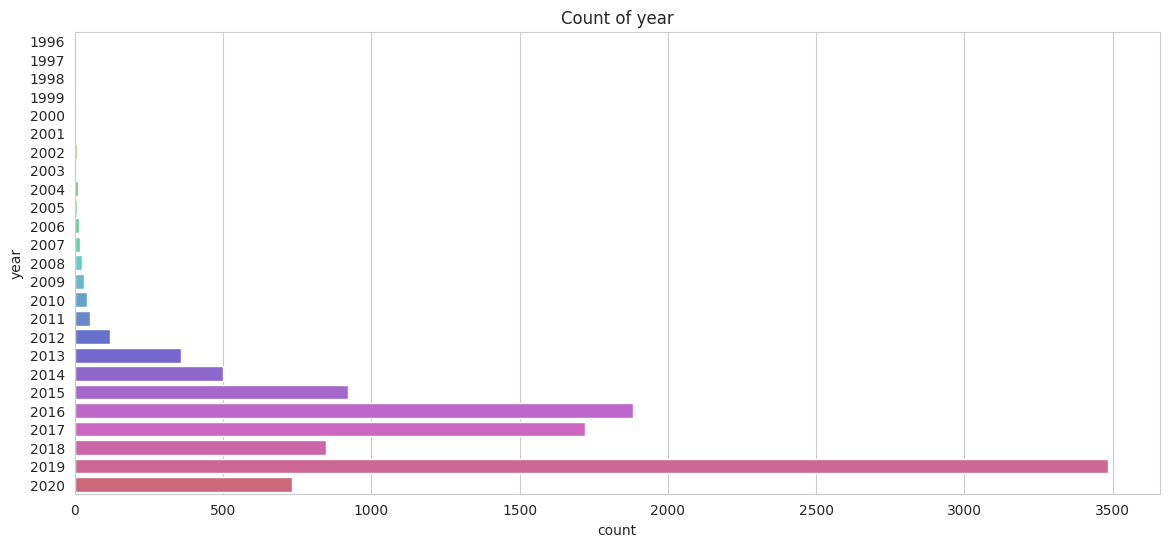

In [11]:
col_count('year')

Number of counts drop siginificantly for cars made before 2013. This may become important here we need to  run a regression analysis as years with little number of samples will have great influence in the coefficient result.

<ipython-input-9-f4ebae038f96>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df.sort_values(col), palette=palette).set_title('Count of {}'.format(col))


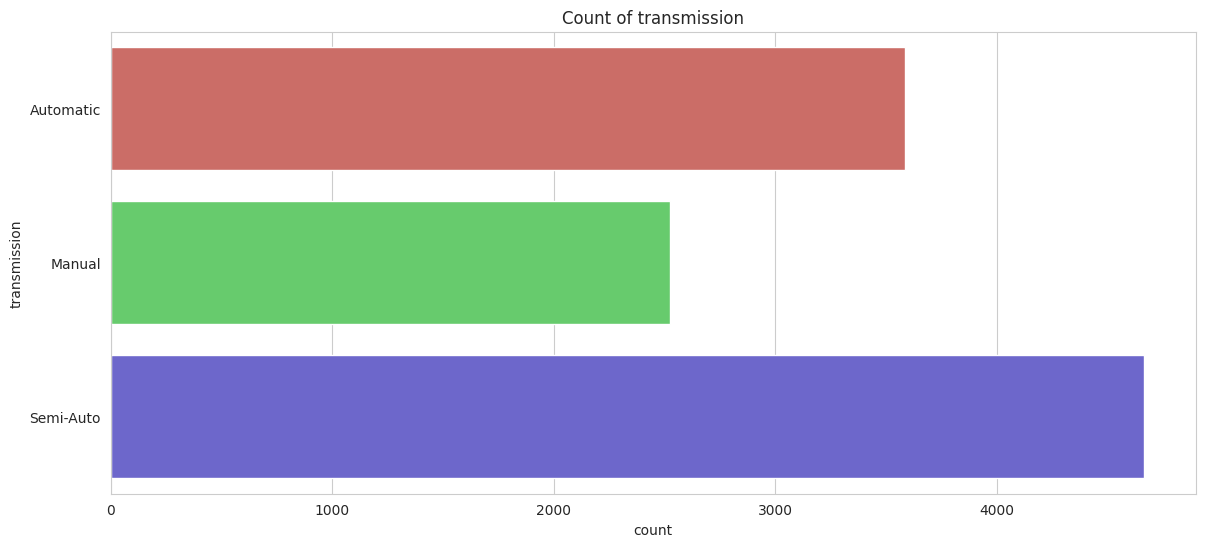

In [12]:
col_count('transmission')

<ipython-input-9-f4ebae038f96>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df.sort_values(col), palette=palette).set_title('Count of {}'.format(col))


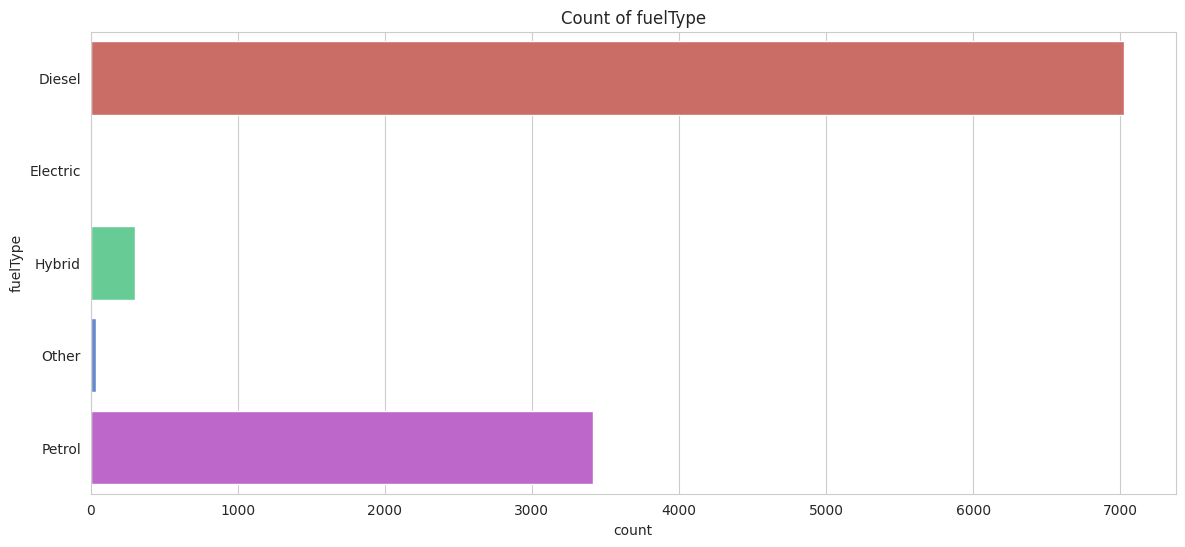

In [13]:
col_count('fuelType')

not enough information on Electric or 'other' types of fuel types due to low sample count.

looking in variables

In [14]:
num_col = ['price', 'mileage', 'tax', 'mpg', 'engineSize']
cat_col = ['model', 'year', 'transmission', 'fuelType']

def plot_kde(cat):
    plt.figure(figsize=(14,6))
    sns.histplot(x=cat, data=df, kde=True)
    plt.title('Distribution of {}'.format(cat))

In [15]:
def plot_ecdf(data, variable):
    x = np.sort(data)
    y = np.arange(1, len(data)+1)/len(data)

    x_norm = np.sort(np.random.normal(data.mean(), data.std(), len(data)))

    plt.figure(figsize=(14,6))
    sns.scatterplot(x=x, y=y, label = variable)
    sns.scatterplot(x=x_norm, y=y, label='Normal distribution')
    plt.title('ECDF of {}'.format(variable))

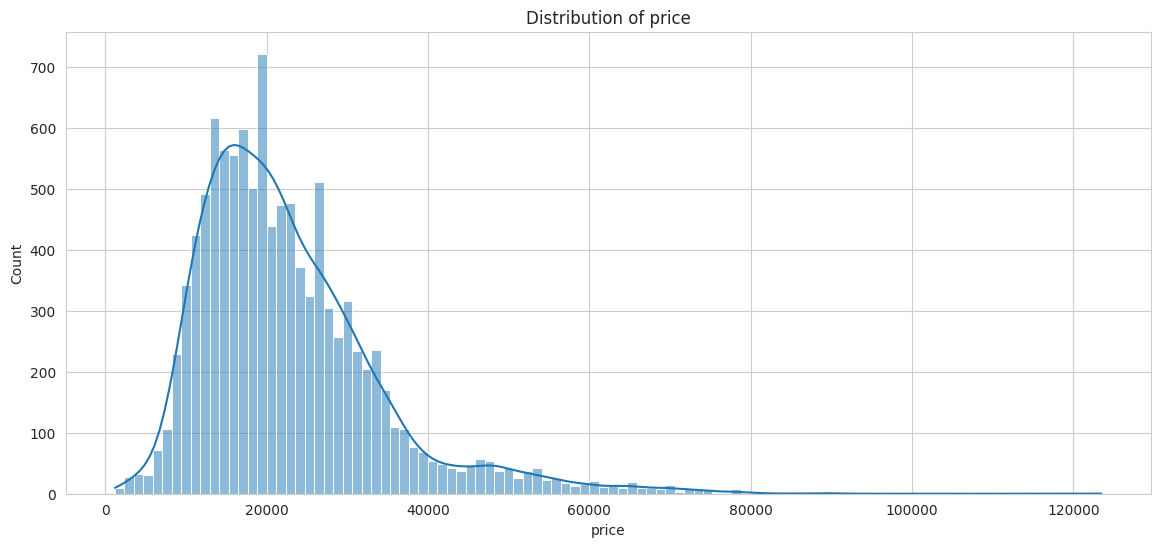

In [16]:
plot_kde('price')

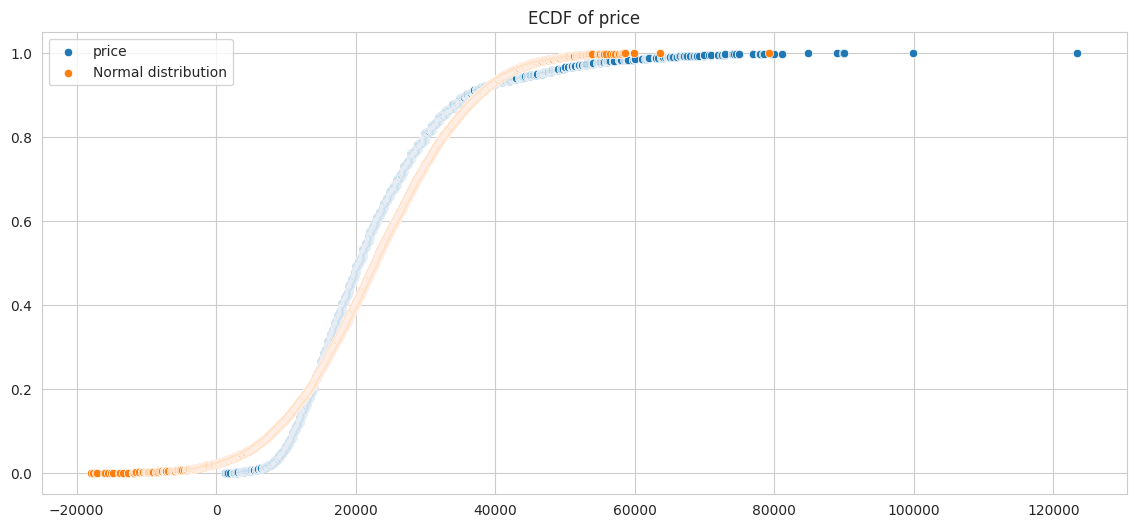

In [17]:
plot_ecdf(df['price'], 'price')

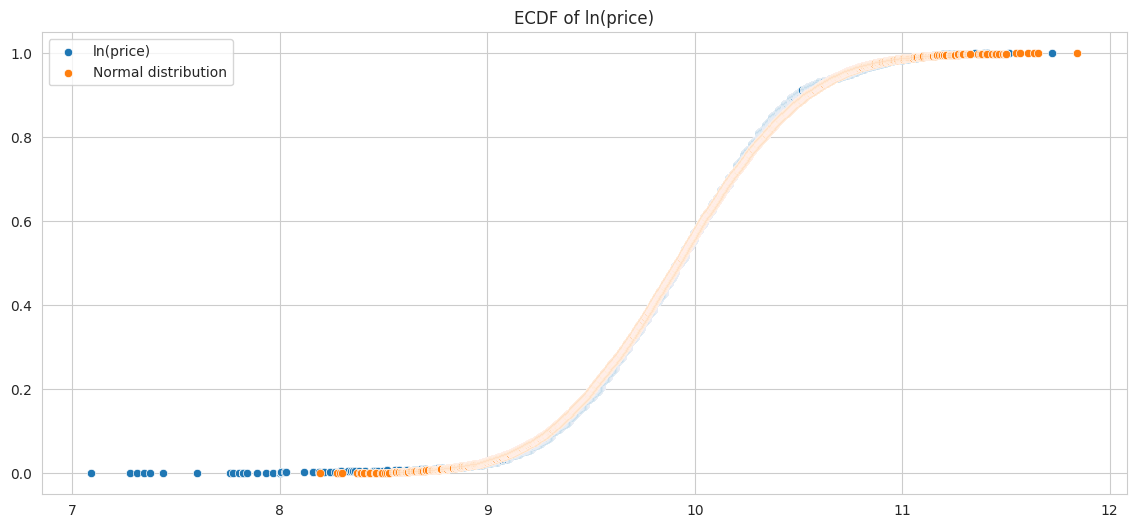

In [18]:
plot_ecdf(np.log(df['price']), 'ln(price)')



*   'Price' distribution has a tail to the right
*   Natural log of price seems to have a normal distribution




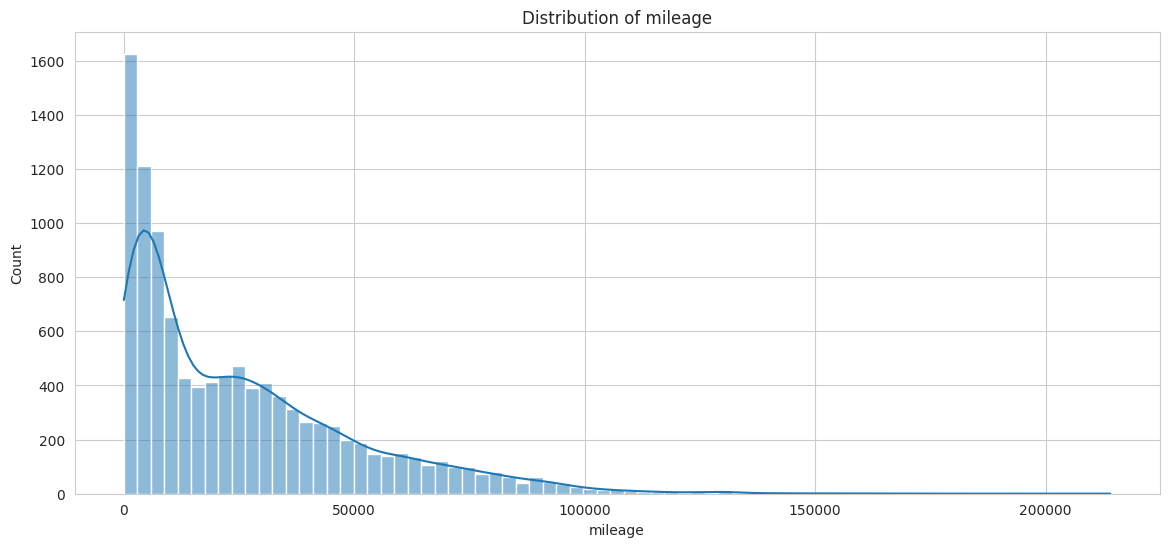

In [19]:
plot_kde('mileage')

Many of the cars in the data is from more recent year production, so this distribution is what was expected.

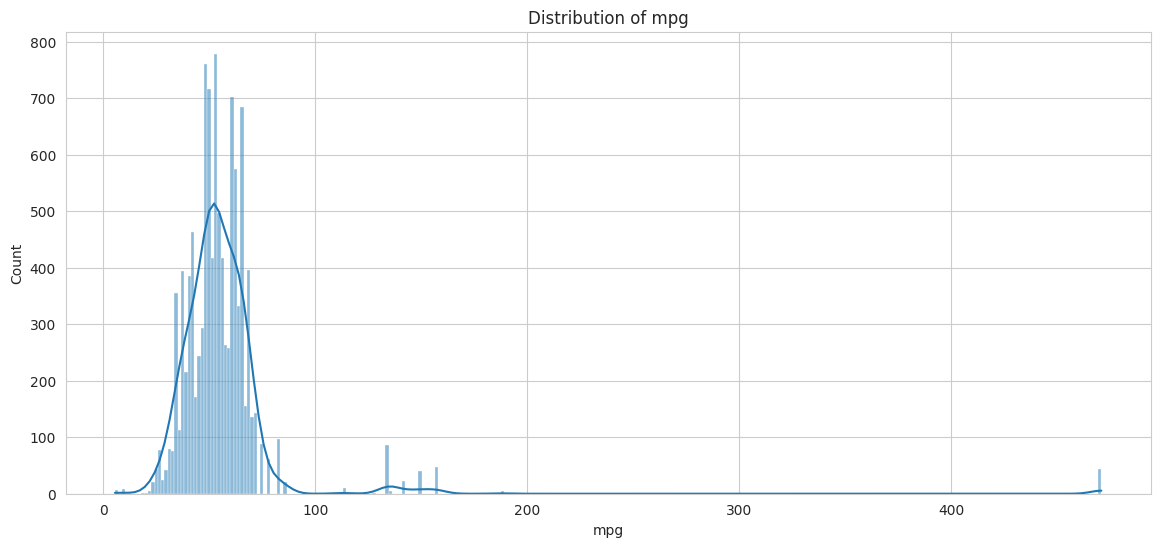

In [20]:
plot_kde('mpg')

There may be some outliers present in the mpg values, or there may be some eco-friendly vehicles with extremely high mpg (note that this mpg value for electirc cars are conversions in energy consumption level).

if there are any oil based cars (non-hybrid) in cars with extremely high mpg values.

In [21]:
high_mpg = df[df['mpg'] > 100]
high_mpg.value_counts('fuelType')

,count
fuelType,
Hybrid,224
Other,33
Electric,3


In [22]:
very_high_mpg = df[df['mpg'] > 400]
very_high_mpg.value_counts('model')

,count
model,
i3,43


In [23]:
df.loc[df['model'] == 'i3', 'mpg'].value_counts()

,count
mpg,
470.8,43


All mpg values for i3 model has 470.8 as its mpg, which is probably an error. I will be filling that number as np.nan.

In [24]:
df.loc[df['model'] == 'i3', 'mpg'] = np.nan

Multi-variable examination

In [26]:
df = pd.get_dummies(df, columns=['transmission'], drop_first=True)

Text(0.5, 1.0, 'Heatmap of correlation of BMW car sales data')

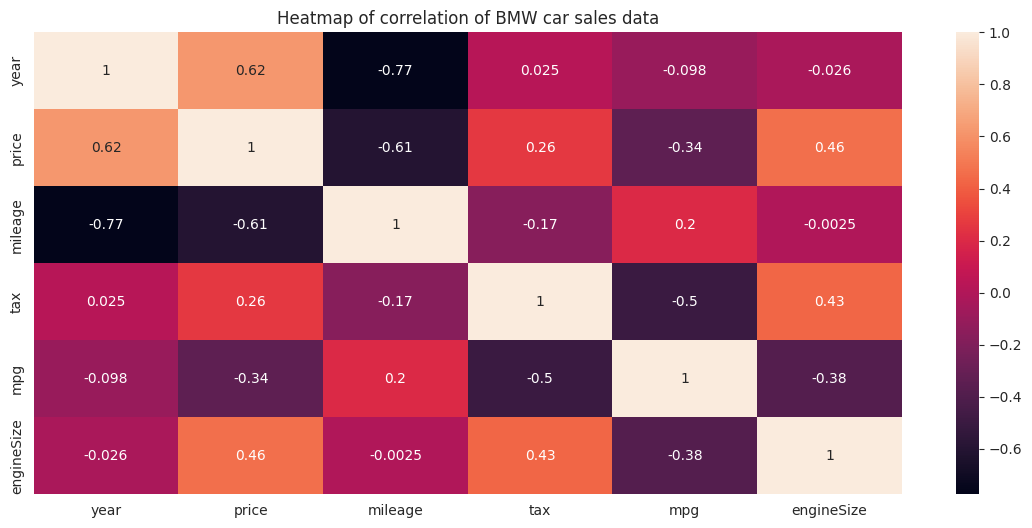

In [28]:
plt.figure(figsize=(14,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)
plt.title('Heatmap of correlation of BMW car sales data')

* Car year (sold or produced?) has a strong, negative correlation with milage (Newer cars have lower miles per gallon? Maybe)
* Car year (sold or produced?) has a strong, positive correlation with price
* Depending on what the 'year' variable represets, there are two different interpretation for this result
* If 'year' variable represents the year which the sale has occured, this suggest that trades made recent years garnered greater price
* Otherwise, this suggest that newer models garnered greater price in used market sales, which seem more plausible.
* Price has a strong, negative correlation with milage (Cars used more tend to be cheaper? Probably)
* Price has a mild, positive correlation with engineSize (Powerful cares are more expensive? Probably)
* Tax has a mild, negative correlation with mpg (Less tax for eco-friendly vehicles? Plausible)
* Mpg has weak, negative correlation with engineSize (Stronger cars is less eco-friendly? Plausible)


In [29]:
# Before going on with the analysis, work with models with significant number of samples (500+)
model_counts = df['model'].value_counts()
models = model_counts[model_counts.values > 500].index
models

df_models = df[df['model'].isin(models)].sort_values('model')

In [30]:
# Function to create point plots
def get_pointplot(x_col, y_col, hue_col, data):
    plt.figure(figsize=(14,6))
    sns.pointplot(x=x_col, y=y_col, hue=hue_col, data=data, alpha=0.5)
    plt.title('{} versus {}'.format(x_col, y_col))

def get_regplot(x_col, y_col, data):
    plt.figure(figsize=(14,6))
    sns.regplot(x=x_col, y=y_col, data=data, order=1)
    plt.title('{} versus {}'.format(x_col, y_col))

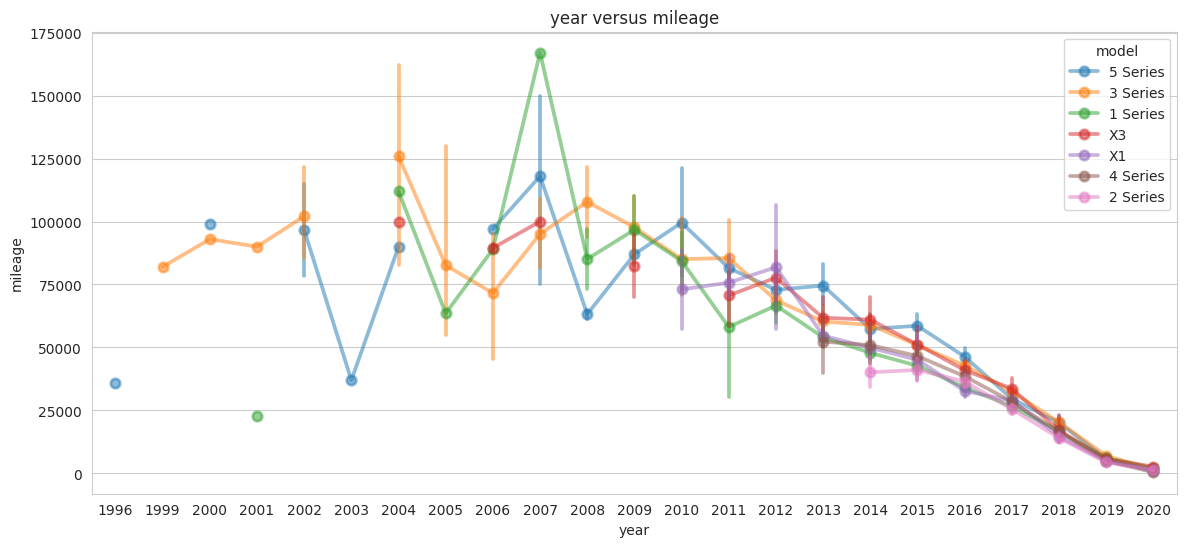

In [31]:
# Year and milage
get_pointplot('year', 'mileage', 'model', df_models)

* I believe that 'year' variable represents the year which the car is produced.
* If that is true, newer models tend to have smaller milage, and the confidence interval for newer models are pretty narrow.
* In addition, this suggest that we may be able to extract some good insights on cars with recent year trade or a model.

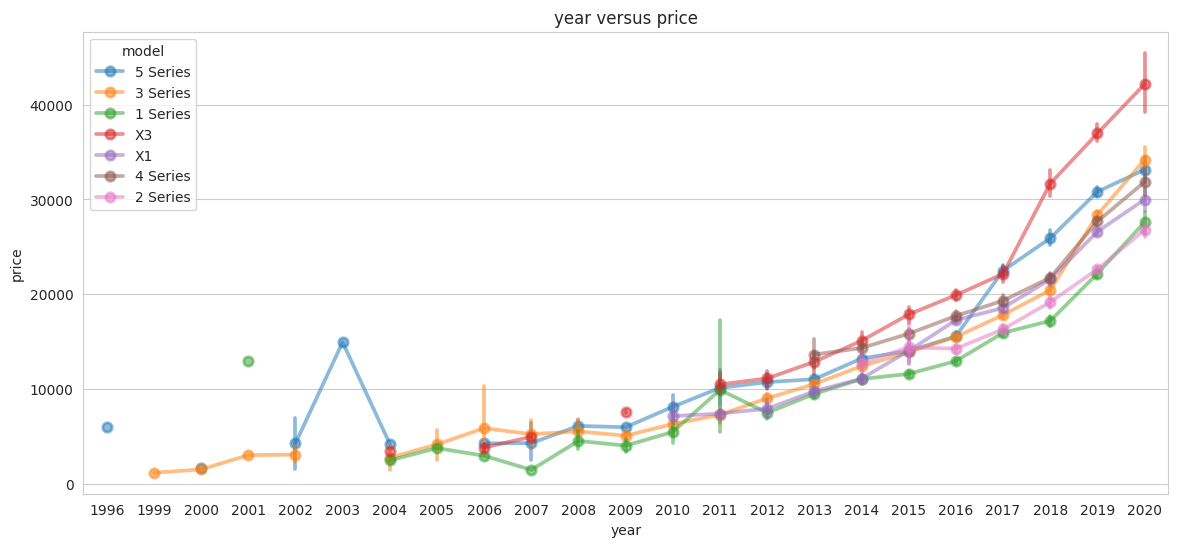

In [32]:
# Year and price
get_pointplot('year', 'price', 'model', df_models)

As expected, older models tend to be cheaper than newer models.

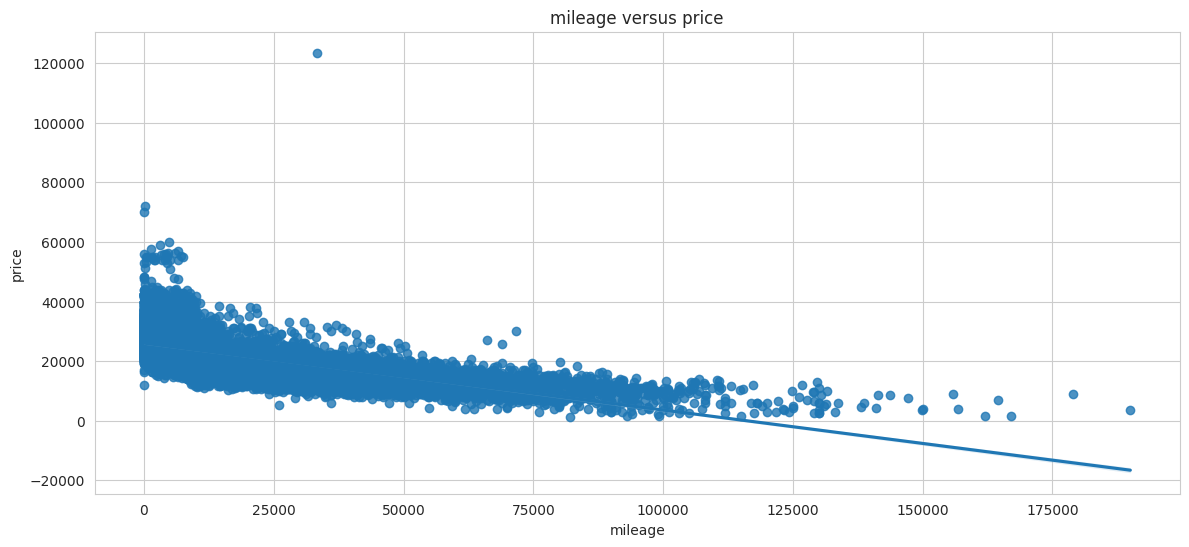

In [33]:
get_regplot('mileage', 'price', df_models)

* Greater milage yields lower price, but almost no car price is dropping below certain threshold (>9000), which suggest that the relationship between mileage and price is probably not a linear one.

* Then, how do we capture the magnitude of relationship between mileage and price? We need to start by analyzing residual plots.

* Most often, residual plots are used to determine whether two variables are good fit to be used for regression. Residual plot visualizes the following:

* Difference between the predicted price and the actual price on y-axis (residuals)
Mileage on x-axis.
* If our estimator is a good fit, we would expect residuals to be distributed evenly across the y=0 line, above and below y=0 throughout the range of price. This suggest that we are capturing the relationship between mileage and price, without overshooting or undershooting .

* However, if distribution of residual is uneven across y=0 line, we would then look for different variable candidates by maniuplating their scale. In this case, we may square/log/... the mileage variable.

Text(0.5, 1.0, 'Residual plot of ln(mileage) versus price (order = 1)')

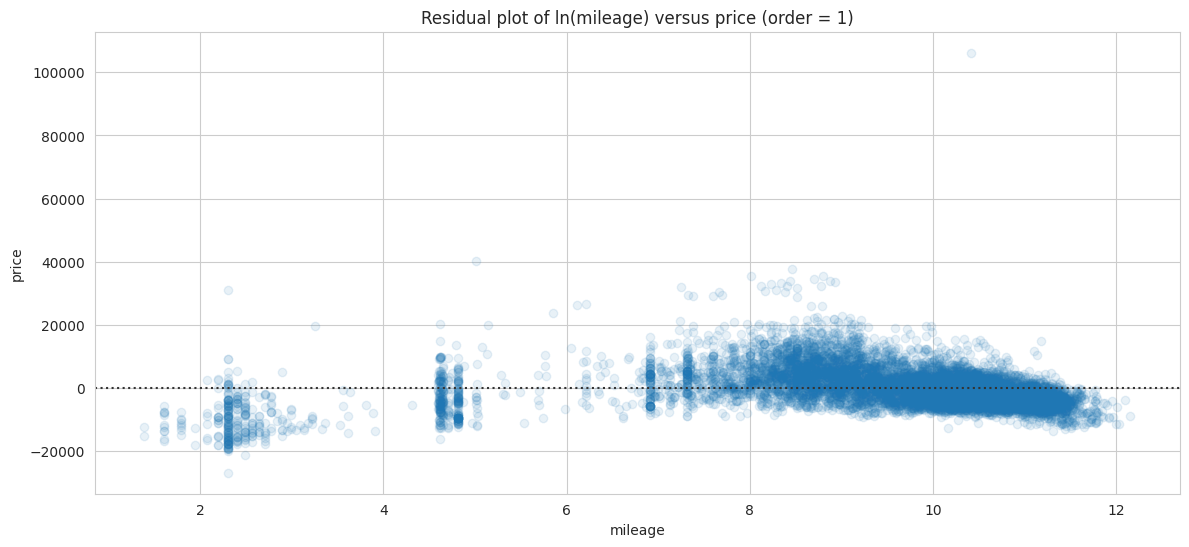

In [34]:
# Residual plot of ln(price)
plt.figure(figsize=(14,6))
sns.residplot(x=np.log(df_models['mileage']), y=df_models['price'], order=1, scatter_kws={'alpha' : 0.1})
plt.title('Residual plot of {} versus {} (order = 1)'.format('ln(mileage)', 'price'))

Text(0.5, 1.0, 'Scatterplot of ln(mileage) and price')

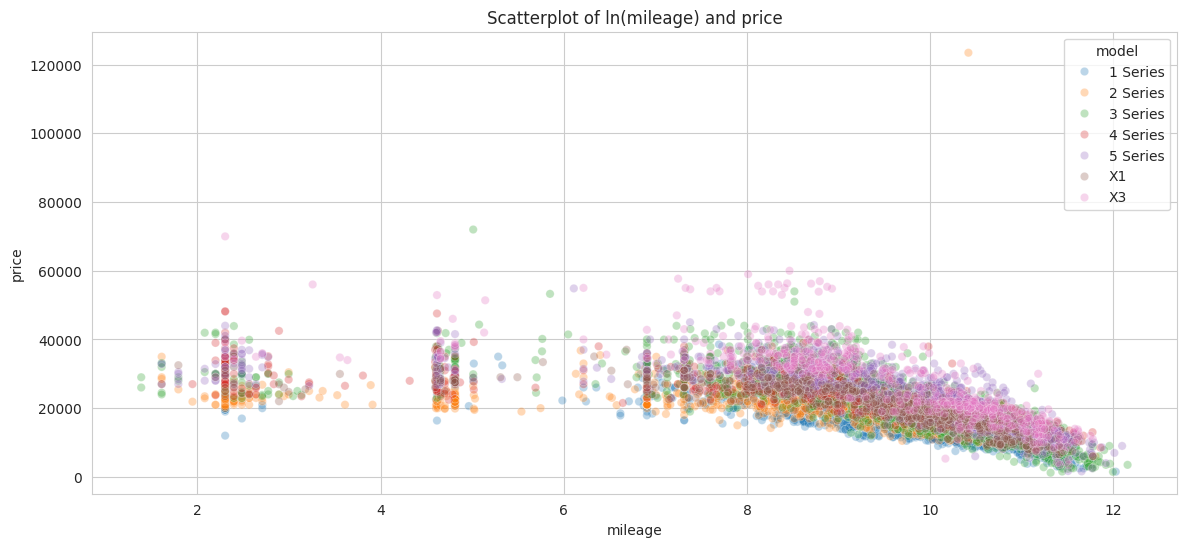

In [35]:
# Examine the scatterplot of ln(price)
plt.figure(figsize=(14,6))
sns.scatterplot(x=np.log(df_models['mileage']), y=df_models['price'], hue=df_models['model'], alpha=0.3)
plt.title('Scatterplot of ln(mileage) and price')

If we look at at the residual plot only, ln(price) does not seem like a good choice of a variable to assess the magnitude of relationship with price via regression.

We can observe that:

Residuals mostly dip below 0 at the extremes of ln(mileage) values (ex. 2, 11) and
Residuals are concentrated above 0 around log(mileage) value of 9.
However, there are two cluster of data around ln(mileage)=2 and ln(mileage)=5 with little milage and little drop in data. Note that ln(mileage) of 2 and 5 corresponds to approximately 55 miles 150 miles. It means that those cars are practically new when it comes to mileage.

It may be wise to exclude cars with very little mileage that can heavily influence any regression result using variables transformed using logarithmic scale.

Text(0.5, 1.0, 'Residual plot of log(mileage) versus price (order = 2)')

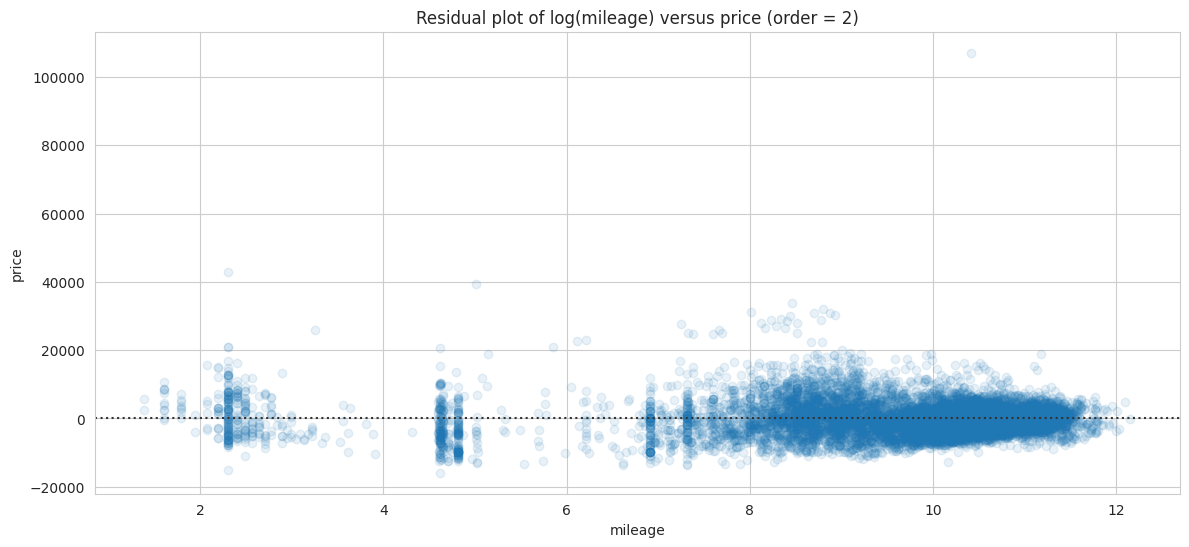

In [37]:
# For fun : Residual plot of log(price)**2
plt.figure(figsize=(14,6))
sns.residplot(x=np.log(df_models['mileage']), y=df_models['price'], order=2, scatter_kws={'alpha' : 0.1})
plt.title('Residual plot of {} versus {} (order = 2)'.format('log(mileage)', 'price'))
plt.title('Residual plot of {} versus {} (order = 2)'.format('log(mileage)', 'price'))

This begs the question...

Which model retains its value of price the best?

I need to answer a few questions on my own before tackling this question.

Retaining car value against what?
Milage is probably the best value to measure against, as it tracks the level of usage regardless of when the car is produced.
However, running a simple regression puts us at risk getting of getting influenced by small number of samples that exist at either extremes of mileage values.
Instead of running a regression, I will be assigning cars a label based on their mileage percentiles and compare their medians.
Should same model of cars produced in different year be considered a different entity?
It is true that carmakers make minor adjustments to cars produced in later years. However, changes tend to be relatively minor. I will use model as the only distinct category in this analysis.
This is a used car dataset. How would you estimate the value retained after a new car is bought?
Unfortunately, the data pertains only on used car sales. Therefore, this analysis would be applicable for used cars only, regardless of its milage. It will not be able to capture the discount between brand new cars versus used cars.
Meanwhile, dataset contains data on used cars with extremely low mileage, and they are going to be used as a benchmark when comparing the value retained after gainin mileage.

Text(0.5, 0, 'ln(mileage)')

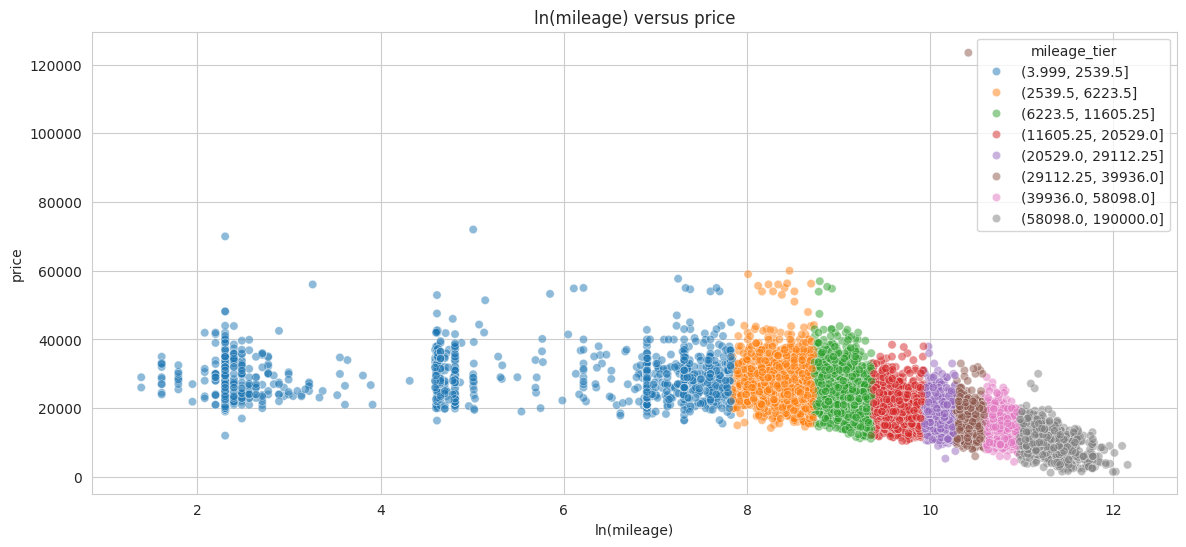

In [38]:
# group cars by mileage using qcut function
df_models['mileage_tier'] = pd.qcut(df_models['mileage'], 8)
df_models.value_counts(['model', 'mileage_tier']).sort_index()
plt.figure(figsize=(14,6))
sns.scatterplot(x=np.log(df_models['mileage']), y=df_models['price'], hue=df_models['mileage_tier'], alpha=0.5)
plt.title('ln(mileage) versus price')
plt.xlabel('ln(mileage)')

In [39]:
# gather the median price for individual mileage tiers
df_pivot = df_models.pivot_table(values='price', index='model', columns='mileage_tier', aggfunc='median')
    # median is more effective against outliers
df_pivot

<ipython-input-39-438bcdce6603>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot = df_models.pivot_table(values='price', index='model', columns='mileage_tier', aggfunc='median')


mileage_tier,"(3.999, 2539.5]","(2539.5, 6223.5]","(6223.5, 11605.25]","(11605.25, 20529.0]","(20529.0, 29112.25]","(29112.25, 39936.0]","(39936.0, 58098.0]","(58098.0, 190000.0]"
model,,,,,,,,
1 Series,24628.5,21950.0,18950.0,15995.0,14495.0,12500.0,10998.0,8396.5
2 Series,22995.0,22064.5,21097.0,17487.5,15997.0,14120.0,12940.0,10982.0
3 Series,30995.0,28980.0,26750.0,20995.0,18000.0,16297.5,13998.5,10500.0
4 Series,28995.0,27143.5,25000.0,20896.0,18990.0,17580.0,15847.0,13500.0
5 Series,31875.0,30000.0,27698.0,24999.5,22492.5,16994.0,14789.5,11850.0
X1,27995.0,25999.0,24482.5,19991.0,18349.0,17276.0,14949.0,10295.0
X3,36876.5,35495.0,33984.0,28399.0,21990.0,20500.0,19100.0,13800.0


In [40]:
# convert price to proportion of tier 0
for i in range(0, df_pivot.shape[0]):
    df_pivot.iloc[i, :] = df_pivot.iloc[i, :]/df_pivot.iloc[i, 0]
df_pivot = df_pivot.iloc[:, 1:]
df_pivot

mileage_tier,"(2539.5, 6223.5]","(6223.5, 11605.25]","(11605.25, 20529.0]","(20529.0, 29112.25]","(29112.25, 39936.0]","(39936.0, 58098.0]","(58098.0, 190000.0]"
model,,,,,,,
1 Series,0.891244,0.769434,0.649451,0.588546,0.507542,0.446556,0.340926
2 Series,0.959535,0.917460,0.760491,0.695673,0.614047,0.562731,0.477582
3 Series,0.934990,0.863042,0.677367,0.580739,0.525811,0.451637,0.338764
4 Series,0.936144,0.862218,0.720676,0.654941,0.606311,0.546543,0.465598
5 Series,0.941176,0.868957,0.784298,0.705647,0.533145,0.463984,0.371765
X1,0.928702,0.874531,0.714092,0.655438,0.617110,0.533988,0.367744
X3,0.962537,0.921563,0.770111,0.596315,0.555910,0.517945,0.374222


Text(0.5, 1.0, 'Value retention of BMW models over mileage (1 = 100% value retained)')

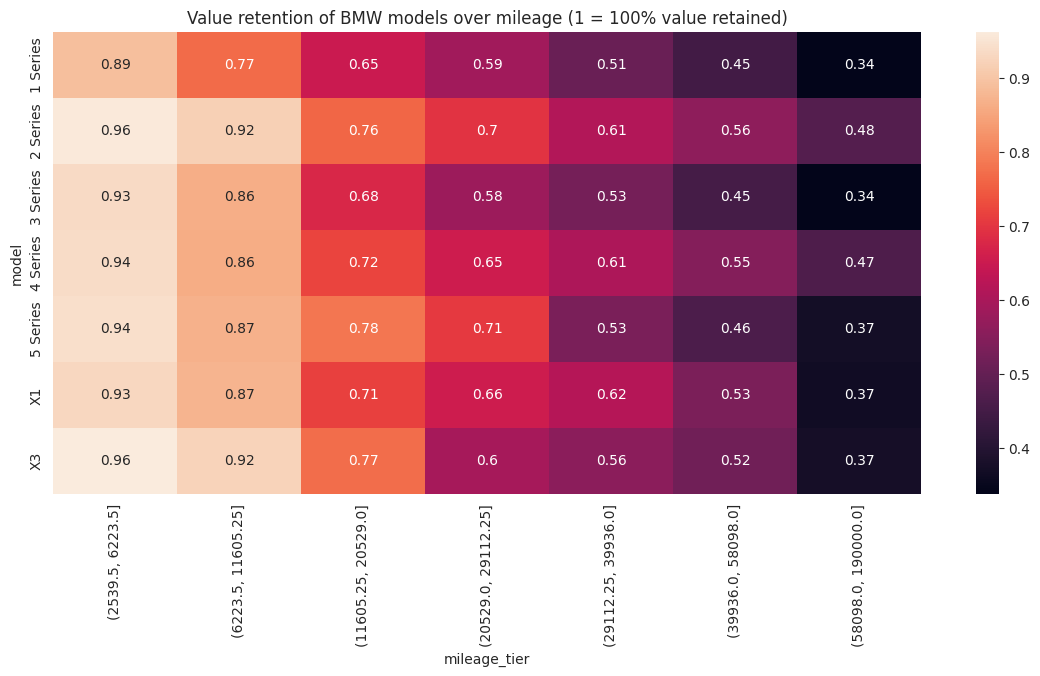

In [41]:
# create a heatmap
plt.figure(figsize=(14,6))
sns.heatmap(df_pivot, annot=True)
plt.title('Value retention of BMW models over mileage (1 = 100% value retained)')

In [42]:
# Create ranking of each
df_rank = df_pivot.rank(axis=0, method='min')
df_rank

mileage_tier,"(2539.5, 6223.5]","(6223.5, 11605.25]","(11605.25, 20529.0]","(20529.0, 29112.25]","(29112.25, 39936.0]","(39936.0, 58098.0]","(58098.0, 190000.0]"
model,,,,,,,
1 Series,1.0,1.0,1.0,2.0,1.0,1.0,2.0
2 Series,6.0,6.0,5.0,6.0,6.0,7.0,7.0
3 Series,3.0,3.0,2.0,1.0,2.0,2.0,1.0
4 Series,4.0,2.0,4.0,4.0,5.0,6.0,6.0
5 Series,5.0,4.0,7.0,7.0,3.0,3.0,4.0
X1,2.0,5.0,3.0,5.0,7.0,5.0,3.0
X3,7.0,7.0,6.0,3.0,4.0,4.0,5.0


Text(0.5, 1.0, 'Value retention ranking of BMW models over mileage (7 = best)')

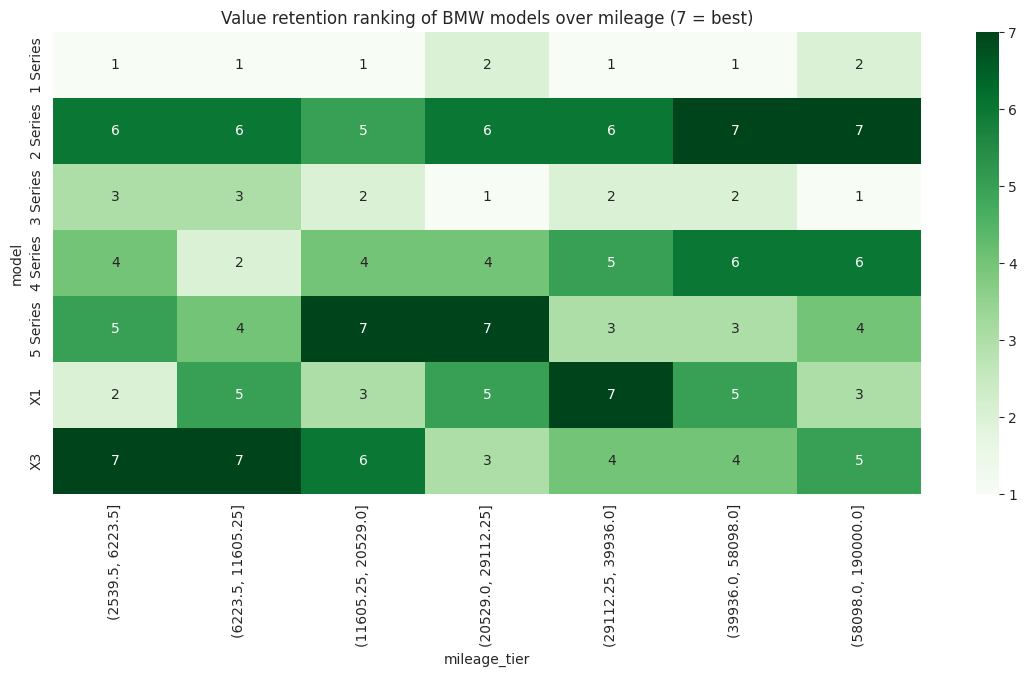

In [43]:
plt.figure(figsize=(14,6))
sns.heatmap(df_rank, annot=True, cmap='Greens')
plt.title('Value retention ranking of BMW models over mileage (7 = best)')

In [44]:
# Get average rank by model
df_averagerank = df_rank.mean(axis=1)
df_averagerank.sort_values(ascending=False)

,0
model,
2 Series,6.142857
X3,5.142857
5 Series,4.714286
4 Series,4.428571
X1,4.285714
3 Series,2.000000
1 Series,1.285714


akeaway:

Based on the average-rank assessment, the models which retain the best value from the best to worst are:
  1. 2 Series (Compact car, Compact MPV)
  2. X3 (Compact Luxury SUV)
  3. 5 Series (Mid-size luxury car)
  4. 4 Series (Compact executive car)
  5. X1 (Sub-compact luxury SUV)
  6. 3 Series (Compact executive car)
  7. 1 Series (Hatchback, coupé, convertible, subcompact car)